In [72]:
import networkx as nx
from numpy.linalg import matrix_power
import numpy as np

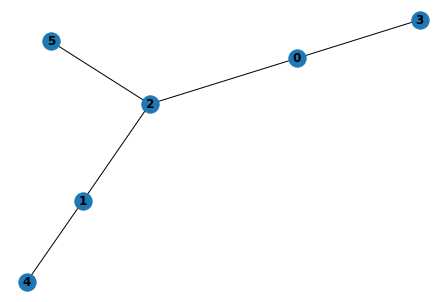

In [73]:
g = nx.random_tree(6)
nx.draw(g, with_labels=True, font_weight='bold')
A = nx.adjacency_matrix(g)

In [74]:
print(A.todense())

[[0 0 1 1 0 0]
 [0 0 1 0 1 0]
 [1 1 0 0 0 1]
 [1 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 1 0 0 0]]


In [75]:
from numpy.linalg import matrix_power
import numpy as np

def matrix_B(A,k):    # compute B = A + A^2 + A^3 + ... + A^k
    A = A.todense()
    n = A.shape[0]
    B = np.zeros(A.shape)
    for i in range(k):
        B += matrix_power(A,k+1)
    for i in range(n):
        for j in range(n):
            if B[i][j] > 0:
                B[i][j] = 1
    return B

def max_row(B):    # return the row with max sum
    num = 0
    maxrow = 0
    for i in range(B.shape[0]):
        if np.sum(B[i]) > num:
            num = np.sum(B[i])
            maxrow = i
    return maxrow

In [76]:
B = matrix_B(A,3)
print(B)

[[1. 1. 0. 0. 0. 1.]
 [1. 1. 0. 0. 0. 1.]
 [0. 0. 1. 1. 1. 0.]
 [0. 0. 1. 1. 1. 0.]
 [0. 0. 1. 1. 1. 0.]
 [1. 1. 0. 0. 0. 1.]]


In [77]:
MaxRow(B)

0